# Постановка задачи
Используется датасет Life Expectancy (WHO), составленный на основе исследований ВОЗ о продолжительности жизни в разных странах.
Данный датасет содержит 21 признака:
1. Страна.
2. Год проведения исследований.
3. Статус страны - развитая или развивающаяся.
4. Смертность среди взрослых - Показатели смертности взрослого населения обоих полов (вероятность смерти в возрасте от 15 до 60 лет на 1000 человек населения).
5. Смертность среди детей - число младенческих смертей на 1000 человек населения.
6. Алкоголь - Потребление алкоголя, зарегистрированное на душу населения (15+) (в литрах чистого алкоголя).
7. Процентные расходы - Расходы на здравоохранение в процентах от валового внутреннего продукта на душу населения (%).
8. Средний индекс массы тела.
9. Случаи смерти детей в возрасте до пяти лет, от 5 до 10, от 10 до 19.
10. Сведения о некоторых заболеваниях: Гепатит В, корь, полиомиелит, ВИЧ\СПИД, дифтерия.
11. Общие расходы - Общие государственные расходы на здравоохранение в процентах от общих государственных расходов (%).
12. ВВП.
13. Население.
14. Доходы от ресурсов - Индекс развития человеческого потенциала с точки зрения структуры доходов и ресурсов (индекс в диапазоне от 0 до 1).
15. Школьное обучение - Количество лет обучения в школе (лет)

А также признак, показывающий среднюю продолжительность жизни, который мы и будем пытаться предсказывать, решая задачу регрессии.


In [ ]:
# Подключим гугл диск и библиотеки:
import numpy as np              # Одномерные и многомерные массивы (array)
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import matplotlib.pyplot as plt # Научная графика
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения
from sklearn.preprocessing import LabelEncoder # для преобразования признаков

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. Изучаем данные


Выведем количество признаков, объектов и названия всех признаков:

In [ ]:
# Загружаем файл:
data_raw = pd.read_csv('/content/drive/MyDrive/Машинное обучение /Life Expectancy Data.csv')

#Посмотрим на размеры таблицы: количество строк (Страна в тот или иной год) и количество столбцов (каждый столбец соответствует конкретному признаку):
#data_raw.shape


# Узнаем кол-во объектов и признаков:
NumberRows, NumberColumns = data_raw.shape
print(f"Количество объектов в датасете: {NumberRows}")
print(f"Количество признаков в датасете: {NumberColumns}")

# Узнаем название всех признаков:
ColumnsNames = data_raw.columns
print("\nНазвания признаков:")
for Column in ColumnsNames:
    print(Column)

Количество объектов в датасете: 2938
Количество признаков в датасете: 22

Названия признаков:
Country
Year
Status
Life expectancy
Adult mortality
Infant deaths
Alcohol
percentage expenditure
Hepatitis B
Measles
BMI
under-five deaths
Polio
Total expenditure
Diphtheria
HIV/AIDS
GDP
Population
thinness  10-19 years
thinness 5-9 years
Income composition of resources
Schooling


Выведем несколько первых и последних строчек из датасета:

In [ ]:
# отобразить пять первых строк:
data_raw.head()

,Country,Year,Status,Life expectancy,Adult mortality,Infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,63.4,227.735,53.2,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,63.0,231.978,55.2,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,62.5,236.221,57.3,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,62.1,240.464,59.5,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,61.6,245.300,61.8,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
# отобразить пять последних строк:
data_raw.tail()

,Country,Year,Status,Life expectancy,Adult mortality,Infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling
2933,Zimbabwe,2004,Developing,44.3,723.0,51.2,4.36,0.0,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,50.4,4.06,0.0,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,50.7,4.43,0.0,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,51.1,1.72,0.0,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2937,Zimbabwe,2000,Developing,46.0,665.0,51.9,1.68,0.0,79.0,1483,...,78.0,7.10,78.0,43.5,547.358878,12222251.0,11.0,11.2,0.434,9.8


Посмотрим информацию о числовых признаках:



In [ ]:
data_raw.describe()

,Year,Life expectancy,Adult mortality,Infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2938.000000,2929.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.221613,173.696481,28.766481,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.317430,118.469317,27.739863,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,84.823500,6.600000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,71.800000,152.058500,18.600000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.800000,232.000000,44.675000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,138.100000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


Посмотрим информацию о категориальных признаках:

In [ ]:
data_raw.describe(include=['object'])

,Country,Status
count,2938,2938
unique,193,2
top,Afghanistan,Developing
freq,16,2426


Теперь, посмотрим на то, какие значения принимает какой-нибудь признак. Например, посмотрим, какие уникальные страны есть в датасете

In [ ]:
# Получение всех уникальных стран:
UniqueCountry = data_raw['Country'].unique()

# Вывод всех уникальных стран:
print("Уникальные страны в датасете:")
for Country in UniqueCountry:
    print(Country)

Уникальные страны в датасете:
Afghanistan
Albania
Algeria
Angola
Antigua and Barbuda
Argentina
Armenia
Australia
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bhutan
Bolivia (Plurinational State of)
Bosnia and Herzegovina
Botswana
Brazil
Brunei Darussalam
Bulgaria
Burkina Faso
Burundi
Côte d'Ivoire
Cabo Verde
Cambodia
Cameroon
Canada
Central African Republic
Chad
Chile
China
Colombia
Comoros
Congo
Cook Islands
Costa Rica
Croatia
Cuba
Cyprus
Czechia
Democratic People's Republic of Korea
Democratic Republic of the Congo
Denmark
Djibouti
Dominica
Dominican Republic
Ecuador
Egypt
El Salvador
Equatorial Guinea
Eritrea
Estonia
Ethiopia
Fiji
Finland
France
Gabon
Gambia
Georgia
Germany
Ghana
Greece
Grenada
Guatemala
Guinea
Guinea-Bissau
Guyana
Haiti
Honduras
Hungary
Iceland
India
Indonesia
Iran (Islamic Republic of)
Iraq
Ireland
Israel
Italy
Jamaica
Japan
Jordan
Kazakhstan
Kenya
Kiribati
Kuwait
Kyrgyzstan
Lao People's Democratic Republic
Latvia
Lebanon
Les

Посмотрим, какой тип данных имеют наши признаки

In [ ]:
# Получение типов данных признаков:
data_types = data_raw.dtypes

# Вывод типов данных:
print("Типы данных признаков в датасете:")
print(data_types)

Типы данных признаков в датасете:
Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult mortality                    float64
Infant deaths                      float64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
BMI                                float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
HIV/AIDS                           float64
GDP                                float64
Population                         float64
thinness  10-19 years              float64
thinness 5-9 years                 float64
Income composition of resources    float64
Schooling                          float64
dtype: object


#2. Вычислим основные характеристики

In [ ]:
# Выбор количественных признаков
num_columns = data_raw.select_dtypes(include=['number']).columns
print (num_columns)

Index(['Year', 'Life expectancy', 'Adult mortality', 'Infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness  10-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')


In [ ]:
# Создание копии датасета, содержащего только выбранные числовые признаки
data_raw_num = data_raw[num_columns]

##2.1 Среднее
Среднее - это статистическая мера, которая используется для оценки центральной тенденции данных. Обычно среднее вычисляется как сумма всех значений в наборе данных, деленная на количество этих значений.
Среднее используется в качестве базовой оценки для сравнения с другими статистическими мерами. А также, для для заполнения пропущенных значений и для выявления аномалий в данных.

In [ ]:
# Подсчет среднего значения для каждого признака
arithmetic_mean = data_raw_num.mean()
print(arithmetic_mean)

Year                               2.007519e+03
Life expectancy                    6.922161e+01
Adult mortality                    1.736965e+02
Infant deaths                      2.876648e+01
Alcohol                            4.602861e+00
percentage expenditure             7.382513e+02
Hepatitis B                        8.094046e+01
Measles                            2.419592e+03
BMI                                3.832125e+01
under-five deaths                  4.203574e+01
Polio                              8.255019e+01
Total expenditure                  5.938190e+00
Diphtheria                         8.232408e+01
HIV/AIDS                           1.742103e+00
GDP                                7.483158e+03
Population                         1.275338e+07
thinness  10-19 years              4.839704e+00
thinness 5-9 years                 4.870317e+00
Income composition of resources    6.275511e-01
Schooling                          1.199279e+01
dtype: float64


##2.2 Разброс
Разброс представляет собой разницу между самым большим и самым маленьким значениями в наборе данных. Это статистическая мера, которая показывает, насколько данные распределены вокруг их среднего значения.

In [ ]:
# Расчет разброса для первых 7 числовых признаков
ranges = data_raw_num.select_dtypes(include=['number']).apply(lambda x: x.max() - x.min())
print(ranges)


Year                               1.500000e+01
Life expectancy                    5.270000e+01
Adult mortality                    7.220000e+02
Infant deaths                      1.381000e+02
Alcohol                            1.786000e+01
percentage expenditure             1.947991e+04
Hepatitis B                        9.800000e+01
Measles                            2.121830e+05
BMI                                8.630000e+01
under-five deaths                  2.500000e+03
Polio                              9.600000e+01
Total expenditure                  1.723000e+01
Diphtheria                         9.700000e+01
HIV/AIDS                           5.050000e+01
GDP                                1.191711e+05
Population                         1.293859e+09
thinness  10-19 years              2.760000e+01
thinness 5-9 years                 2.850000e+01
Income composition of resources    9.480000e-01
Schooling                          2.070000e+01
dtype: float64


## Выбросы
Выбросы - это экстремальные или необычные значения в наборе данных, которые существенно отличаются от большинства других значений. Выбросы могут быть результатом ошибок измерения, случайных флуктуаций или настоящих аномалий в данных.

 Для поиска и подсчета выбросов воспользуемся эвристическим правилом.

In [ ]:
emissions = {}
for columns in data_raw_num.columns:
    Q1 = data_raw[columns].quantile(0.25)
    Q3 = data_raw[columns].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1 * IQR
    upper_bound = Q3 + 1 * IQR
    emissionstmp = (data_raw[columns] < lower_bound) | (data_raw[columns] > upper_bound)
    emissions[columns] = emissionstmp.sum()

# Вывод информации о выбросах
print("Количество выбросов:")
for columns, count in emissions.items():
    print(f"{columns}: {count}")

Количество выбросов:
Year: 0
Life expectancy: 119
Adult mortality: 181
Infant deaths: 184
Alcohol: 14
percentage expenditure: 454
Hepatitis B: 305
Measles: 593
BMI: 0
under-five deaths: 465
Polio: 357
Total expenditure: 108
Diphtheria: 347
HIV/AIDS: 584
GDP: 438
Population: 374
thinness  10-19 years: 179
thinness 5-9 years: 180
Income composition of resources: 130
Schooling: 181


## корреляционная матрица
Корреляционная матрица представляет собой таблицу, в которой коэффициент корреляции между парами переменных из набора данных отображается в виде чисел. Коэффициент корреляции показывает степень линейной зависимости между двумя переменными.

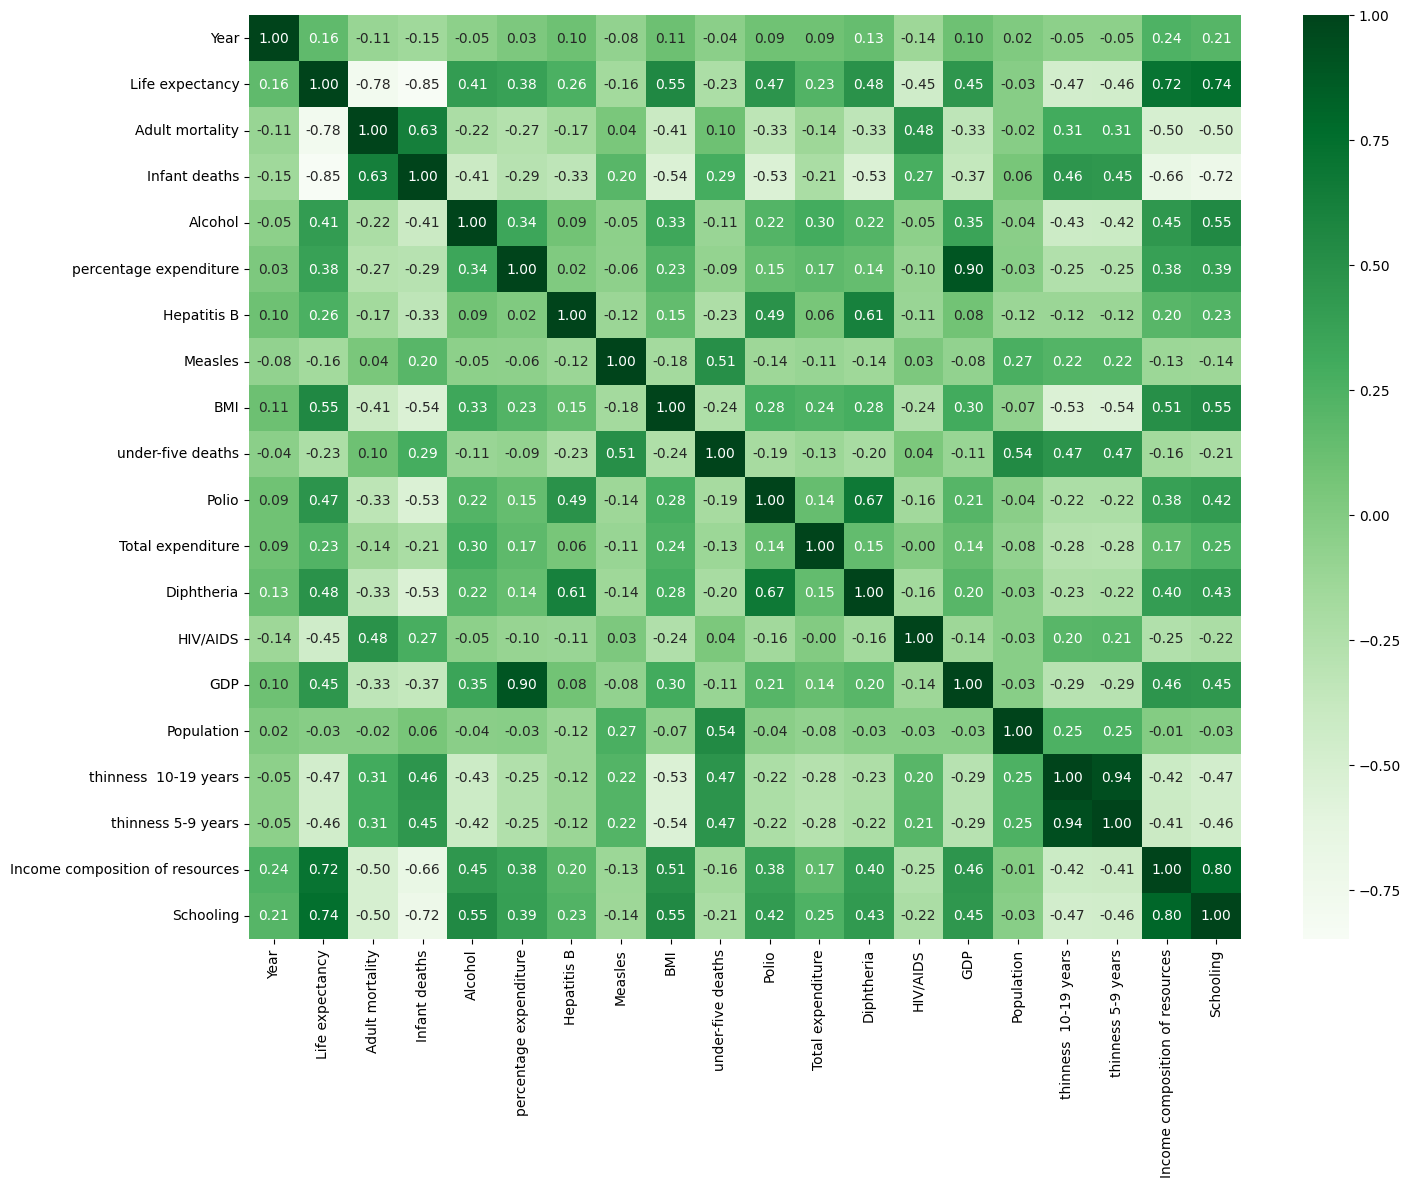

In [ ]:
# Построение корреляционной матрицы
correlation_matrix = data_raw_num.corr()
plt.figure(figsize=(16,12))
sns.heatmap(correlation_matrix, annot=True,fmt=".2f", cmap="Greens")
plt.show()


Можно заменить, что столбцы "GDP" и "percenage expenditure" имеют корреляцию, равную почти единице. Поэтому, можно удалить один их этих столбцов.

In [ ]:
data_raw.drop('percentage expenditure', axis=1, inplace=True)


In [ ]:
data_raw_num.drop('percentage expenditure', axis=1, inplace=True)


<ipython-input-80-d025021d37a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_raw_num.drop('percentage expenditure', axis=1, inplace=True)


In [ ]:
data_raw.shape

(2938, 21)

## Визуализация данных

Построим диаграммы рассеивания.
Диаграмма рассеивания - это график, который используется для визуализации взаимосвязи между двумя переменными. На диаграмме рассеивания каждая точка представляет одно наблюдение и показывает значения двух переменных.

In [ ]:
data_raw.columns


Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult mortality',
       'Infant deaths', 'Alcohol', 'Hepatitis B', 'Measles', 'BMI',
       'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness  10-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

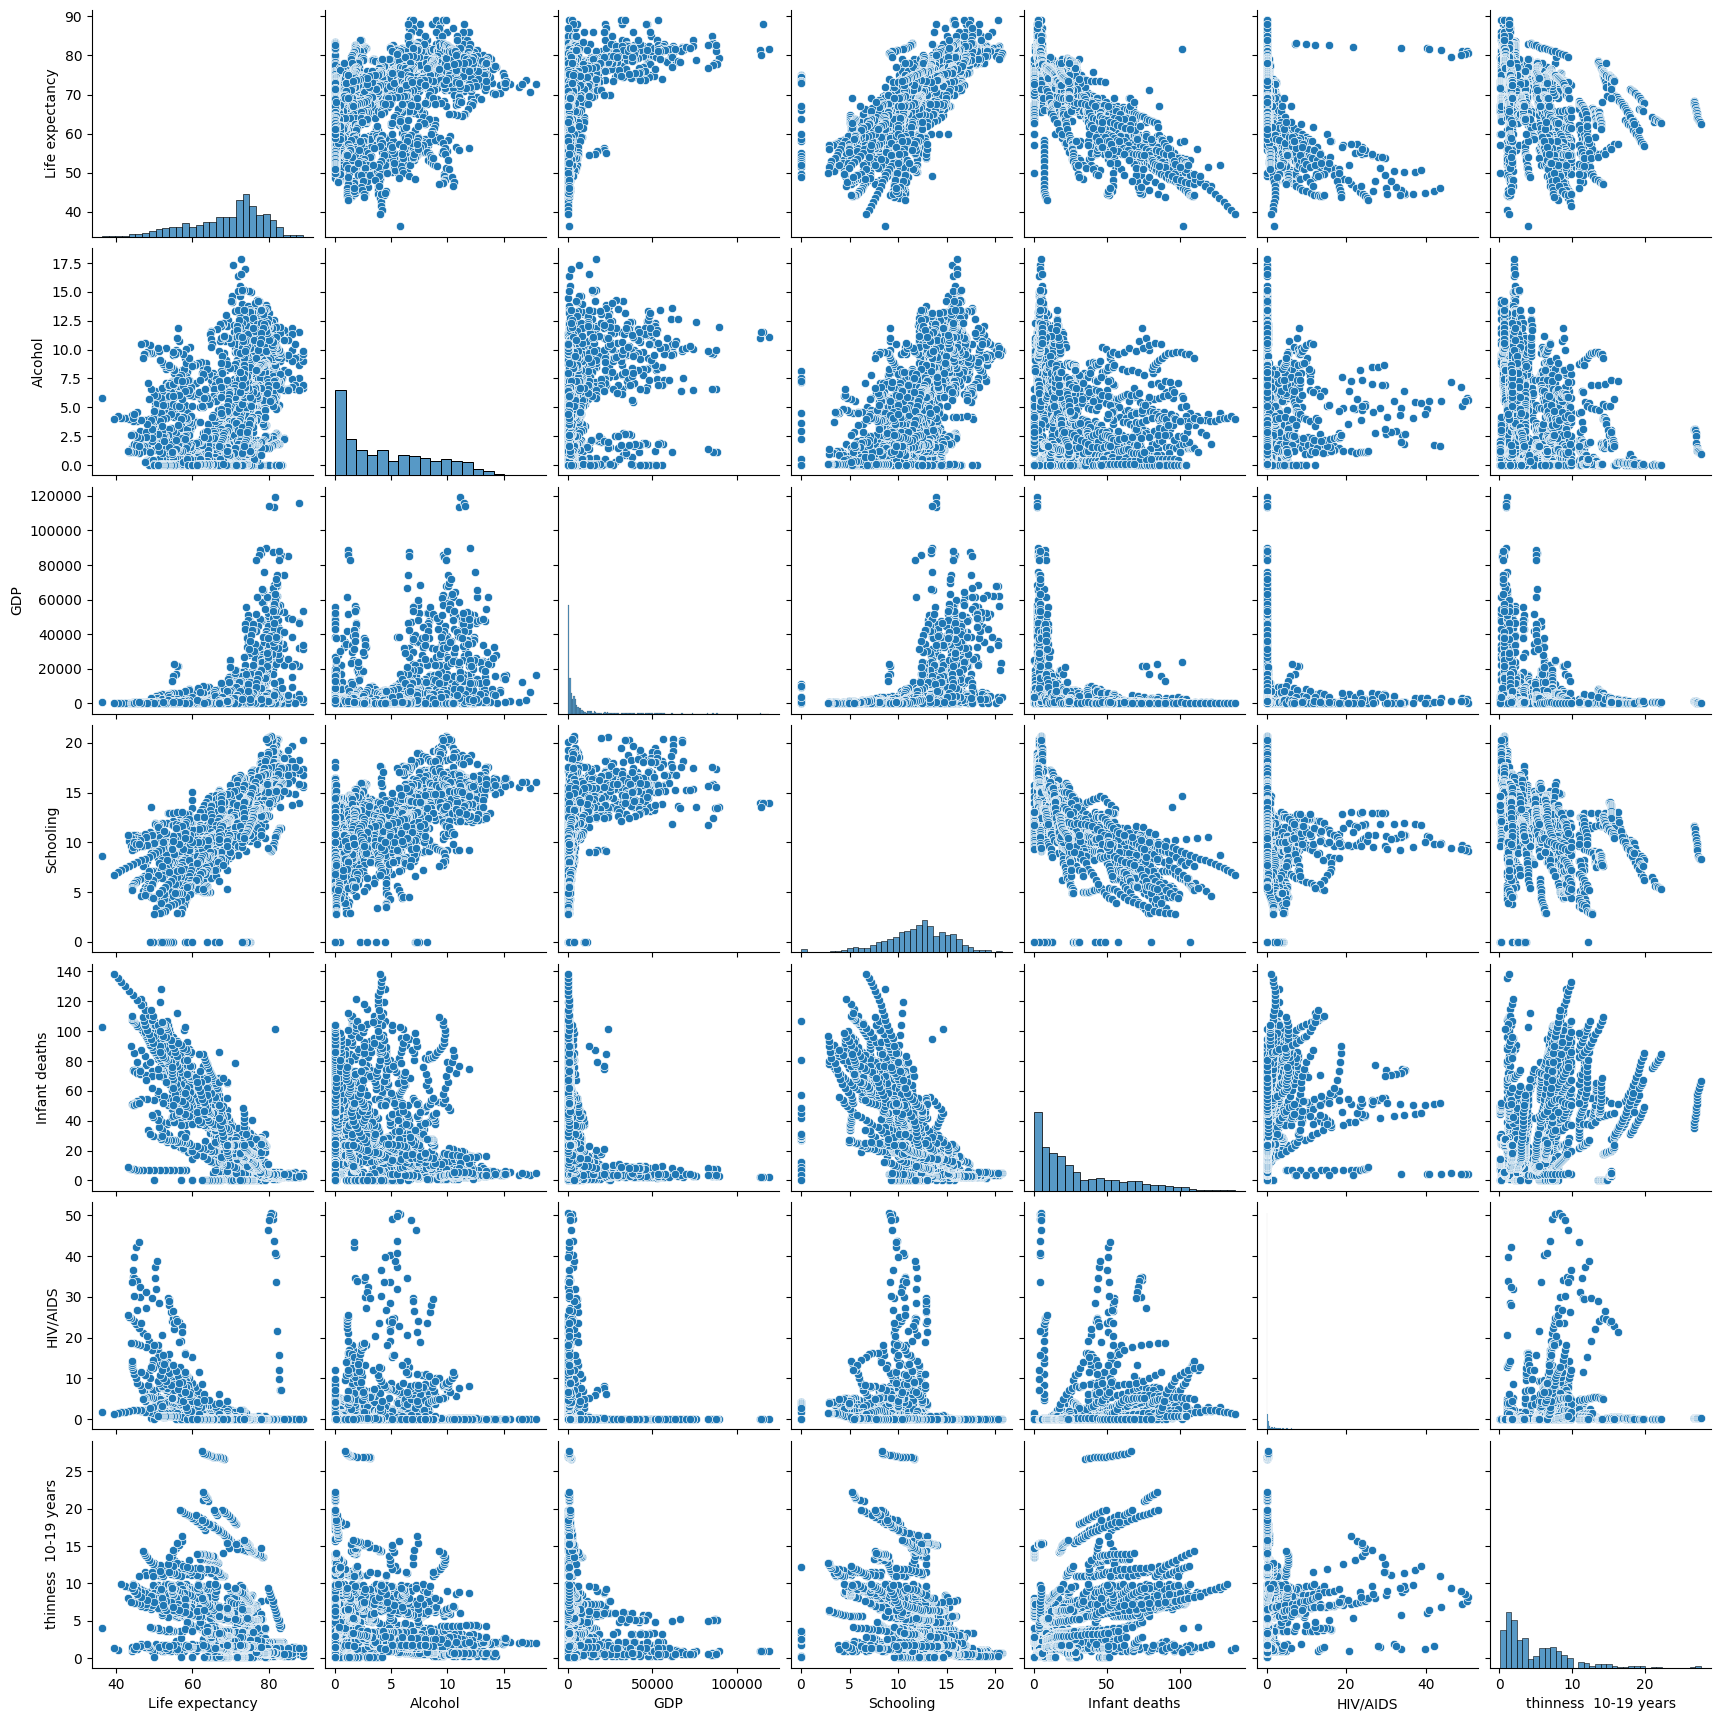

In [ ]:
# Построение диаграмм рассеивания, но так как их будет слишком много, выберем несколько признаков:
Selection = data_raw_num[['Life expectancy', 'Alcohol', 'GDP', 'Schooling','Infant deaths','HIV/AIDS','thinness  10-19 years']]
sns.pairplot(Selection)
plt.show()

#3. Работа с данными

## 3.1. Обработка пропущенных значений

In [ ]:
# Подсчитаем количество пропущенных значений по каждому признаку:
data_raw.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult mortality                      9
Infant deaths                        0
Alcohol                            194
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  10-19 years               34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

Самым простым способом было бы удалить каждую строку с отсутствующими данными, но тогда, будет удалено большое число данных, поэтому, это нежелательный подход.

Простая стратегия - заполнить пропущенные значения средним или медианой (для количественных признаков) или модой (для номинальных признаков).

Заполним медианами пропущенные значения в столбцах, соответствующих числовым признакам:


In [ ]:
from sklearn.impute import SimpleImputer
imp_num = SimpleImputer(missing_values=np.nan, strategy='median')
imp_num.fit(data_raw[['Adult mortality','Life expectancy','Alcohol','Hepatitis B','BMI','Polio','Total expenditure','Diphtheria','GDP','Population','thinness  10-19 years','thinness 5-9 years','Income composition of resources','Schooling']])

SimpleImputer(strategy='median')

In [ ]:
# Нашле медианы, теперь, заполним пропущенные значения этими медианами:
data_raw[['Adult mortality','Life expectancy','Alcohol','Hepatitis B','BMI','Polio','Total expenditure','Diphtheria','GDP','Population','thinness  10-19 years','thinness 5-9 years','Income composition of resources','Schooling']] = imp_num.transform(data_raw[['Adult mortality','Life expectancy','Alcohol','Hepatitis B','BMI','Polio','Total expenditure','Diphtheria','GDP','Population','thinness  10-19 years','thinness 5-9 years','Income composition of resources','Schooling']])

In [ ]:
# Подсчет количества пропущенных значений по каждому признаку
data_raw.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult mortality                    0
Infant deaths                      0
Alcohol                            0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  10-19 years              0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

##3.2. Обработка категориальных признаков

In [ ]:
# Получение типов данных признаков:
data_types = data_raw.dtypes

# Вывод типов данных:
print("Типы данных признаков в датасете:")
print(data_types)

Типы данных признаков в датасете:
Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult mortality                    float64
Infant deaths                      float64
Alcohol                            float64
Hepatitis B                        float64
Measles                              int64
BMI                                float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
HIV/AIDS                           float64
GDP                                float64
Population                         float64
thinness  10-19 years              float64
thinness 5-9 years                 float64
Income composition of resources    float64
Schooling                          float64
dtype: object


Столбцы 'Country' и 'Status' содержат категориальные значения. Пока они имеют тип 'Object'. Заменим тип на специальный, предназначенный для хранения категориальных значений:

In [ ]:
data_raw[['Country', 'Status']] = data_raw[['Country', 'Status']].astype('category')
data_raw['Country'].dtype
# ordered=False - категориальный неупорядоченный признак;

CategoricalDtype(categories=['Afghanistan', 'Albania', 'Algeria', 'Angola',
                  'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
                  'Austria', 'Azerbaijan',
                  ...
                  'United Republic of Tanzania', 'United States of America',
                  'Uruguay', 'Uzbekistan', 'Vanuatu',
                  'Venezuela (Bolivarian Republic of)', 'Viet Nam', 'Yemen',
                  'Zambia', 'Zimbabwe'],
, ordered=False)

In [ ]:
data_raw['Status'].dtype

CategoricalDtype(categories=['Developed', 'Developing'], ordered=False)

##3.3. Преобразование в численные признаки:

Преобразуем "Country" и "Status" в численные признаки. Для этого используем LabelEncoder из библиотеки scikit-learn.

Каждой уникальной категории будет назначено уникальное целочисленное значение.

In [ ]:
# Создание объекта LabelEncoder
label_encoder = LabelEncoder()

# Преобразование "Release Country" в численный признак
data_raw['Country'] = label_encoder.fit_transform(data_raw['Country'])

# Создание объекта LabelEncoder
label_encoder = LabelEncoder()

# Преобразование "Release Country" в численный признак
data_raw['Status'] = label_encoder.fit_transform(data_raw['Status'])

In [ ]:
# Получение типов данных признаков:
data_types = data_raw.dtypes

# Вывод типов данных:
print("Типы данных признаков в датасете:")
print(data_types)

Типы данных признаков в датасете:
Country                              int64
Year                                 int64
Status                               int64
Life expectancy                    float64
Adult mortality                    float64
Infant deaths                      float64
Alcohol                            float64
Hepatitis B                        float64
Measles                              int64
BMI                                float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
HIV/AIDS                           float64
GDP                                float64
Population                         float64
thinness  10-19 years              float64
thinness 5-9 years                 float64
Income composition of resources    float64
Schooling                          float64
dtype: object


In [ ]:
# отобразить пять первых строк:
data_raw.head()

,Country,Year,Status,Life expectancy,Adult mortality,Infant deaths,Alcohol,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,2015,1,63.4,227.735,53.2,0.01,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0,2014,1,63.0,231.978,55.2,0.01,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,2013,1,62.5,236.221,57.3,0.01,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0,2012,1,62.1,240.464,59.5,0.01,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0,2011,1,61.6,245.300,61.8,0.01,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
# отобразить пять последних строк:
data_raw.tail()

,Country,Year,Status,Life expectancy,Adult mortality,Infant deaths,Alcohol,Hepatitis B,Measles,BMI,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
2933,192,2004,1,44.3,723.0,51.2,4.36,68.0,31,27.1,...,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,44.3
2934,192,2003,1,44.5,715.0,50.4,4.06,7.0,998,26.7,...,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,44.5
2935,192,2002,1,44.8,73.0,50.7,4.43,73.0,304,26.3,...,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,44.8
2936,192,2001,1,45.3,686.0,51.1,1.72,76.0,529,25.9,...,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,45.3
2937,192,2000,1,46.0,665.0,51.9,1.68,79.0,1483,25.5,...,7.10,78.0,43.5,547.358878,12222251.0,11.0,11.2,0.434,9.8,46.0


##3.4. Нормализация

Перед применением алгоритмов машинного обучения количественные признаки полезно нормализовать.
стандартизация - линейное преобразование, приводящее все значения к нулевому среднему и единичному стандартному отклонению.
Выполним стандартизацию некоторых числовых признаков с использованием библиотеки Pandas.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# Выбор количественных признаков
num_columns = ['Adult mortality','BMI','GDP','Polio','thinness 5-9 years']
print (num_columns)

# Создадим экземпляр StandardScaler
scaler = MinMaxScaler()

# Нормализация:
data_raw[num_columns] = scaler.fit_transform(data_raw[num_columns])


['Adult mortality', 'BMI', 'GDP', 'Polio', 'thinness 5-9 years']


In [ ]:
data_raw.head()

,Country,Year,Status,Life expectancy,Adult mortality,Infant deaths,Alcohol,Hepatitis B,Measles,BMI,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
0,0,2015,1,63.4,0.314037,53.2,0.01,65.0,1154,0.209733,...,8.16,65.0,0.1,0.004889,33736494.0,17.2,0.603509,0.479,10.1,63.4
1,0,2014,1,63.0,0.319914,55.2,0.01,62.0,492,0.203940,...,8.18,62.0,0.1,0.005127,327582.0,17.5,0.610526,0.476,10.0,63.0
2,0,2013,1,62.5,0.325791,57.3,0.01,64.0,430,0.198146,...,8.13,64.0,0.1,0.005287,31731688.0,17.7,0.617544,0.470,9.9,62.5
3,0,2012,1,62.1,0.331668,59.5,0.01,67.0,2787,0.192352,...,8.52,67.0,0.1,0.005608,3696958.0,17.9,0.628070,0.463,9.8,62.1
4,0,2011,1,61.6,0.338366,61.8,0.01,68.0,3013,0.187717,...,7.87,68.0,0.1,0.000519,2978599.0,18.2,0.635088,0.454,9.5,61.6


#4. Классификация

## Разбить данные на обучающую и тестовую выборки
Разобьем данные на обучающую и тестовую выборки в пропорции 3:1 (75% - обучающая выборка, 25% - тестовая):

In [ ]:
X = data_raw.drop(['Life expectancy'], axis=1)
y = data_raw['Life expectancy']

In [ ]:
X.columns

Index(['Country', 'Year', 'Status', 'Adult mortality', 'Infant deaths',
       'Alcohol', 'Hepatitis B', 'Measles', 'BMI', 'under-five deaths',
       'Polio', 'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP',
       'Population', 'thinness  10-19 years', 'thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [ ]:
data_raw.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult mortality',
       'Infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  10-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'Life expectancy '],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape

N_train, N_test

(2203, 735)

Я буду рассматривать классификтор Random Forest. Random Forest обычно обеспечивает высокую точность предсказаний благодаря комбинированию результатов нескольких деревьев решений.  Random Forest также хорошо справляется с обработкой категориальных данных и выбросов, и может быть эффективен даже при наличии пропущенных значений в данных.

Наиболее не подходящим подходом к решению данной задачи, будем использование нейронных сетей, так как наши данных довольно разнородны, да и количество признаков не является слишком большим.

Реализуем Random Forest:

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Инициализация модели:
model = RandomForestRegressor(n_estimators = 200, random_state = 42) # по умолчанию n_estimators=100

# Обучение модели:
model.fit(X_train, y_train)

predict_test = model.predict(X_test)
predict_train = model.predict(X_train)

# Оценки точности модели:
R2_test = r2_score(y_test, predict_test)
MSE_test = mean_squared_error(y_test, predict_test)

R2_train = r2_score(y_train, predict_train)
MSE_train = mean_squared_error(y_train, predict_train)

print("Тестовая выборка: R2 =", R2_test, "MSE =", MSE_test)
print("Тренировочная выборка: R2 =", R2_train, "MSE =", MSE_train)

Тестовая выборка: R2 = 0.9746871640275059 MSE = 2.2196055404761927
Тренировочная выборка: R2 = 0.995089416344429 MSE = 0.4243811088288664


In [ ]:
importances = model.feature_importances_
importances

array([5.46556090e-03, 2.77119893e-03, 4.23514415e-04, 2.11858862e-01,
       5.89206219e-01, 5.97462727e-03, 9.64217348e-04, 1.75989786e-03,
       6.03218233e-03, 7.98604058e-03, 1.67317106e-03, 2.95494183e-03,
       1.19344297e-03, 6.32695987e-02, 3.04423226e-03, 1.98899946e-03,
       3.89308252e-03, 6.71391289e-03, 7.34707547e-02, 9.35554341e-03])

In [ ]:
np.sum(importances)

1.0

Посмотрим оценки важности признаков

In [ ]:
importances = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
importances

Infant deaths                      0.589206
Adult mortality                    0.211859
Income composition of resources    0.073471
HIV/AIDS                           0.063270
Schooling                          0.009356
under-five deaths                  0.007986
thinness 5-9 years                 0.006714
BMI                                0.006032
Alcohol                            0.005975
Country                            0.005466
thinness  10-19 years              0.003893
GDP                                0.003044
Total expenditure                  0.002955
Year                               0.002771
Population                         0.001989
Measles                            0.001760
Polio                              0.001673
Diphtheria                         0.001193
Hepatitis B                        0.000964
Status                             0.000424
dtype: float64

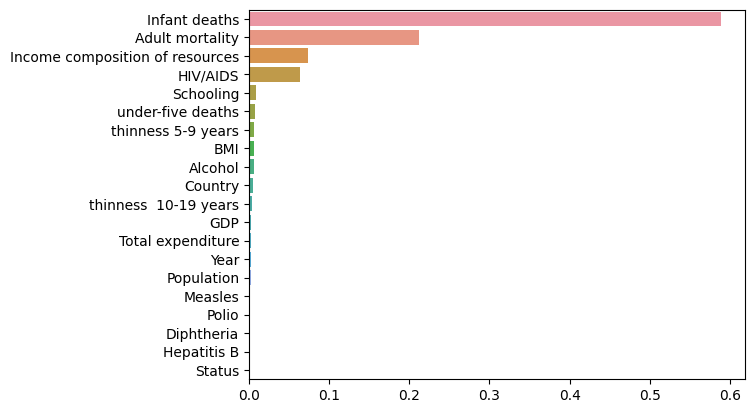

In [ ]:
sns.barplot(y=importances.index, x=importances, orient="h")
pass

Подбор гиперпараметров

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

model = RandomForestRegressor()

# Задаем сетку параметров для перебора
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(model, param_grid, cv=2, scoring='neg_mean_squared_error', n_jobs=1, verbose=2)
grid_search.fit(X, y)

# Лучшие параметры:
best_params = grid_search.best_params_

# Лучшая модель:
best_model = grid_search.best_estimator_

# Оценки точности модели:
predict_test = best_model.predict(X_test)
predicts_train = best_model.predict(X_train)


R2_test = r2_score(y_test, predict_test)
R2_train = r2_score(y_train, predict_train)

# Рассчитаем среднеквадратичную ошибку для тестовой и тренировочной выборок
MSE_test = mean_squared_error(y_test, predict_test)
MSE_train = mean_squared_error(y_train, predict_train)

# Выведем результаты
print("Тестовая выборка: R-квадрат =", R2_test, "MSE =", MSE_test)
print("Тренировочная выборка: R-квадрат =", R2_train, "MSE =", MSE_train)

Fitting 2 folds for each of 81 candidates, totalling 162 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   4.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   5.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   2.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.9s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   3.1s
[CV] END max_depth=10, min_sa

Мы хотели добиться результата, чтобы R-квадрат быль большим, а MSE малым. Можно заменить, что теперь результаты стали немного лучше, в частности, улучшилось значение MSE. Также, результаты на тестовой и тренировочной выброках стали приблизительно одинаковыми.

In [ ]:
# Выберем случайный фильм из вашего датасета
Country = ['Country']

random_Country = data_raw.sample(1)
print("Страна:", random_Country['Country'].values[0])

Country = random_Country.drop(['Life expectancy'], axis=1)
predicted_rating = best_model.predict(Country)

print("Средняя продолжительность жизни:", predicted_rating)

Страна: 39
Средняя продолжительность жизни: [77.81519745]


# Общий вывод

Выполнив данное домашнее задание, мне удалось самостоятельно пройти через весь процесс обучения простой модели. Научившись считывать данные, я перешел к их предобработке. Я разобрался с проблемой пропущенных значение, заполнив их медианами для соответствующих признаков, а также, обработал категориальные признаки, преобразовав их в числовые, чтобы алгоритмы классификации могли с ними легко взаимодействовать.

Также, я вычислил основные характеристики, такие, как среднее, разброс и выбросы, что дало мне больше информации о моем датасете.

Перейдя непосредственно к использованию алгоритмов классификации, я остановил свой выбор на алгоритме «Random Forest», благодаря чему, мне удалось добиться хорошей точности получившейся модели.  
